<a href="https://colab.research.google.com/github/Radha10-04/Heart-Disease/blob/main/heart_dicease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd
z=pd.read_csv('/content/drive/MyDrive/heart.csv')

In [9]:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
print(z.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   55    1   1     120   236    0        1       178     0      0.8    2   
4   56    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [11]:
print(z.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB
None


In [12]:
z.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.010381,0.678201,1.020761,131.377163,247.961938,0.145329,0.515571,150.231834,0.318339,1.007612,1.418685,0.712803,2.314879,0.570934
std,9.132316,0.467977,1.027192,17.518432,51.596208,0.353043,0.514309,22.899650,0.466640,1.133491,0.613333,1.022596,0.596128,0.495801
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
print("no of rows:{}\n".format(z.shape[0]))
print("no of colums:{}\n".format(z.shape[1]))
print("list of features: {} ".format(z.columns.tolist()))

no of rows:289

no of colums:14

list of features: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'] 


In [14]:
z["output"].value_counts()

,count
output,
1,165
0,124


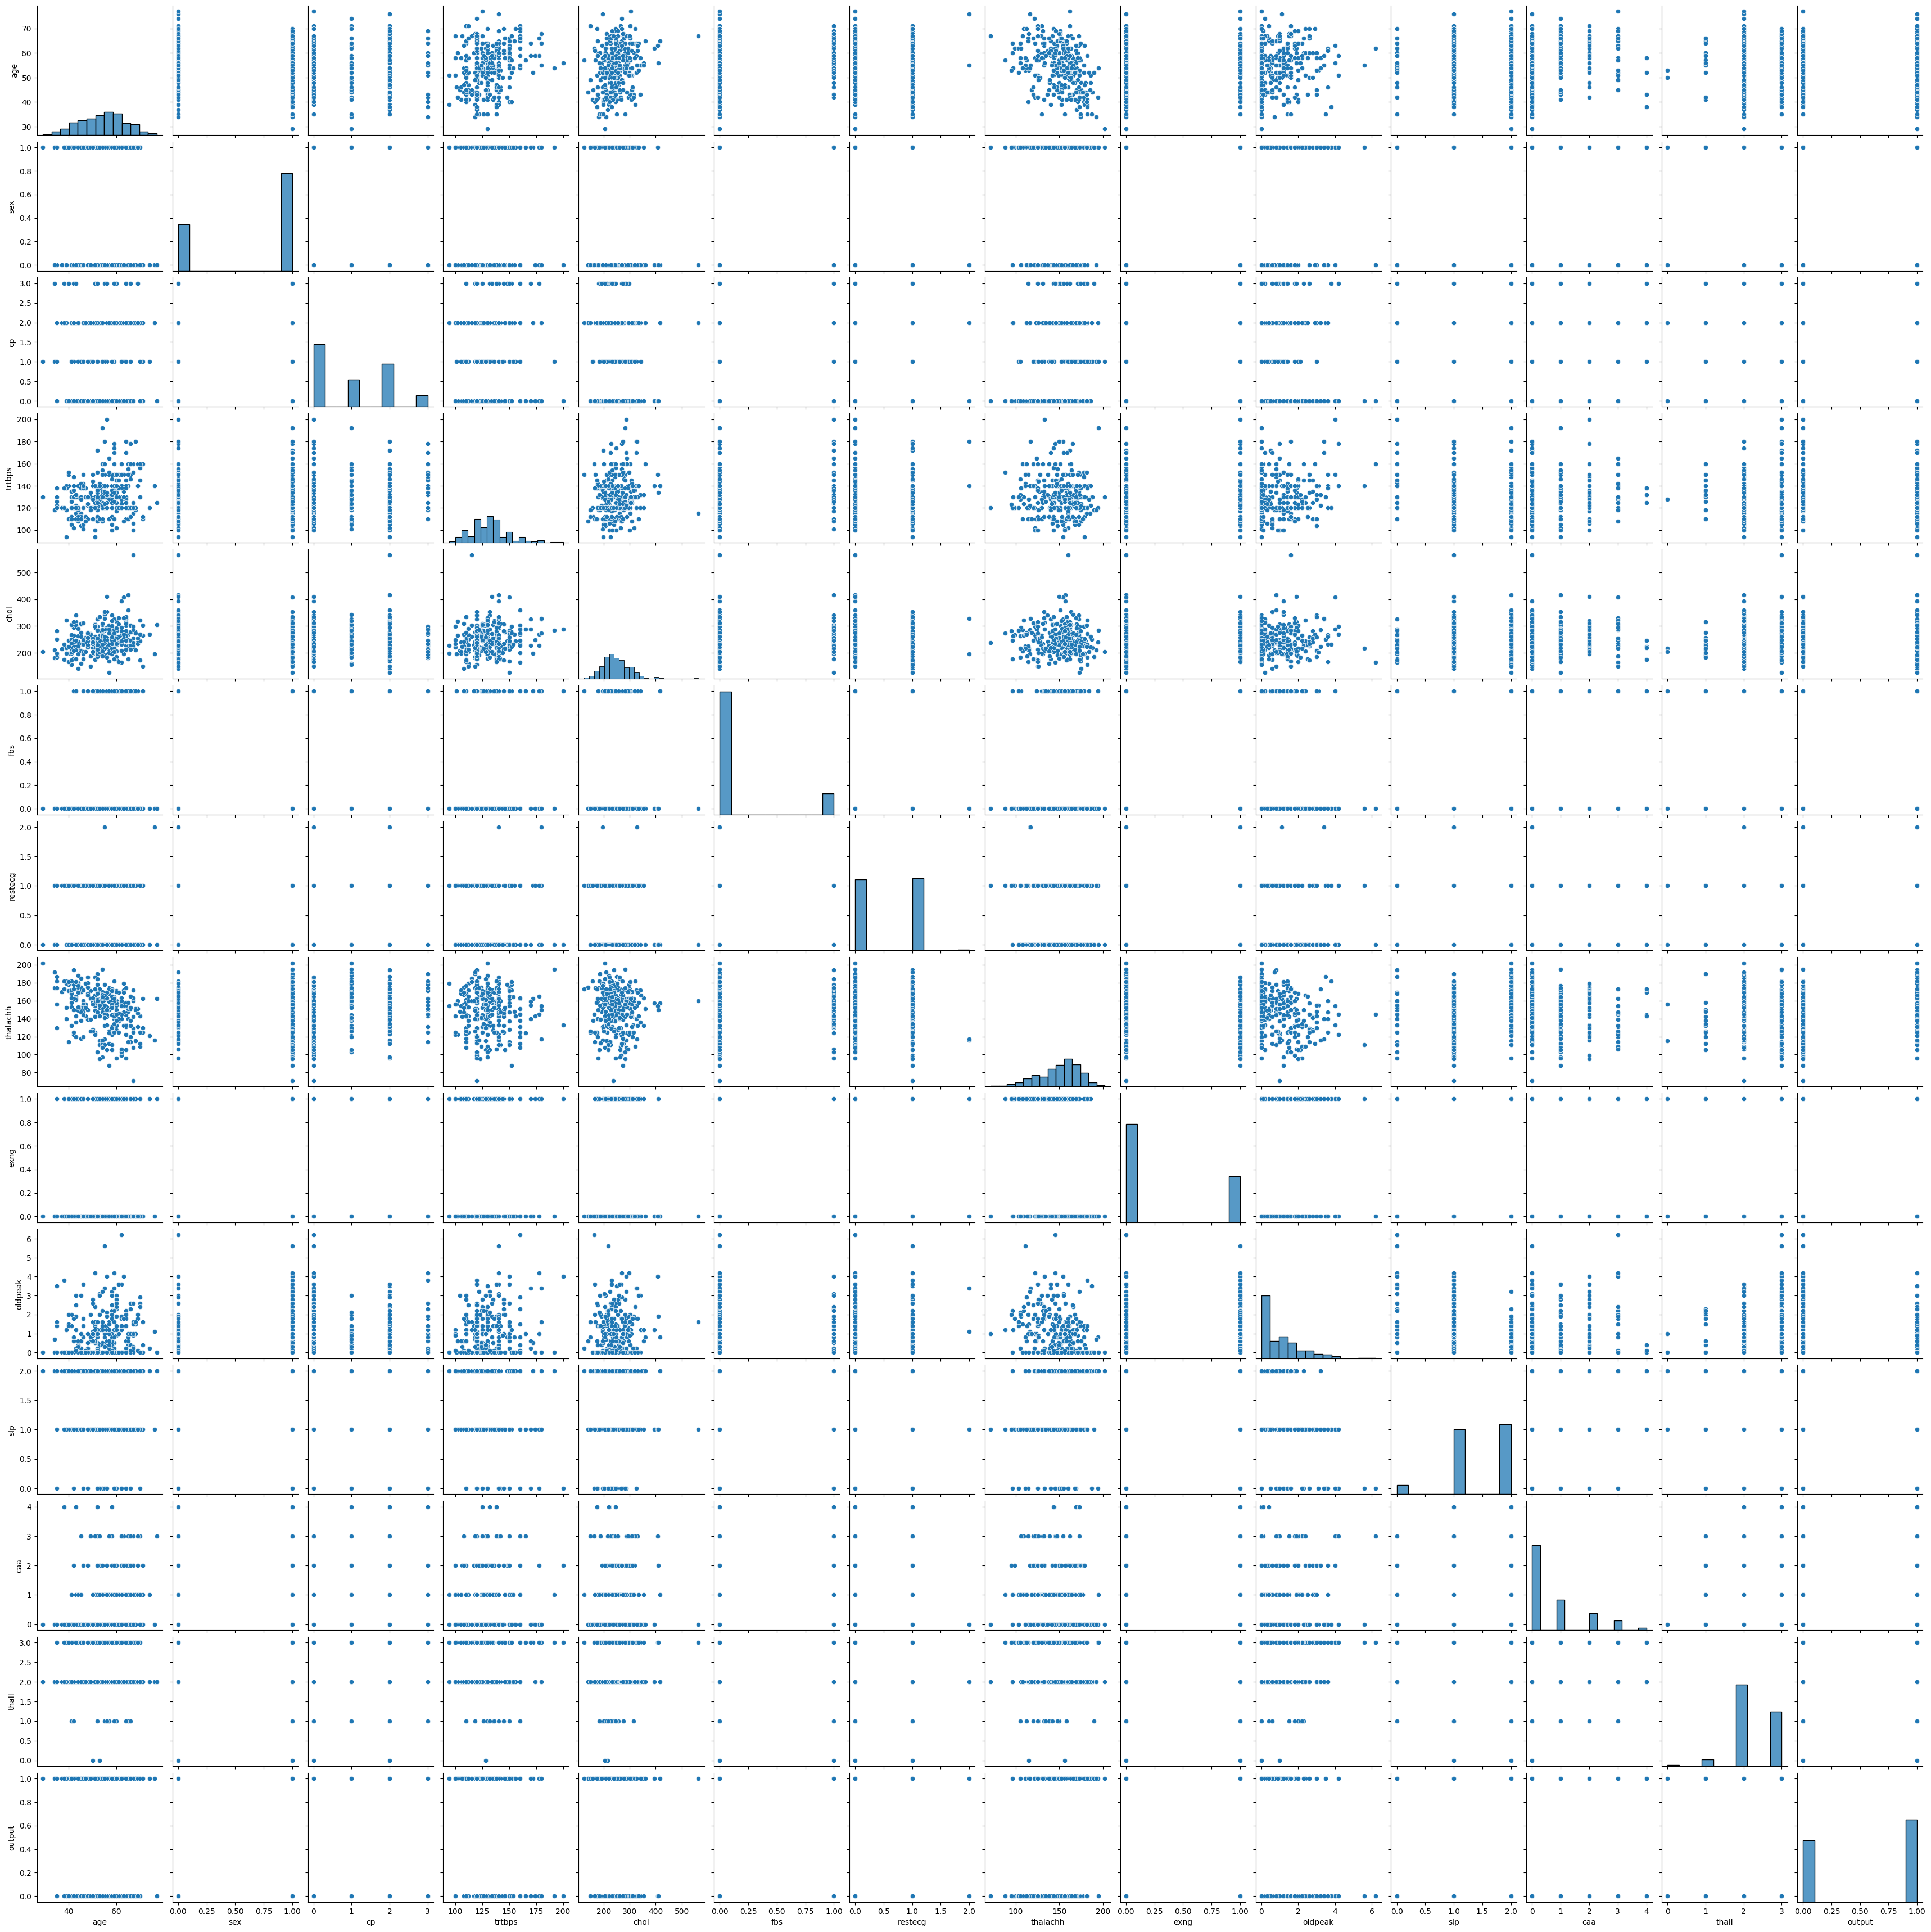

In [15]:
sns.pairplot(z)

<Axes: >

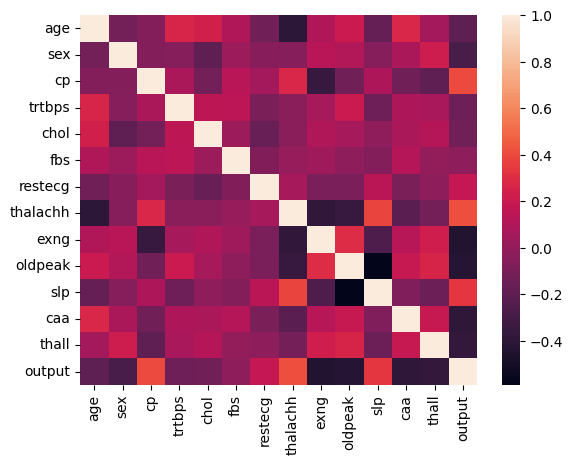

In [16]:
sns.heatmap(z.corr())

In [17]:
x=z[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y=z["output"]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=101)

In [19]:
print("shape of data set: ",z.shape)
print("\nshape of test data set: " ,X_test.shape)
print("\nshape of train data set: " ,X_train.shape)

shape of data set:  (289, 14)

shape of test data set:  (58, 13)

shape of train data set:  (231, 13)


In [20]:
model = LogisticRegression()
model.fit(X_train, Y_train)
LogisticRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8701298701298701


In [22]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [23]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8275862068965517


In [24]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
